In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/sample_data/CSAW_data1.csv", sep=';',header=0)

In [ ]:
df.head()

,anon_patientid,exam_year,anon_filename,x_age,x_case,x_cancer_laterality,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,imagelaterality,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,2015,00002_20990909_L_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Left,CC,127.25809,29.595217,23.256058
1,2,2015,00002_20990909_L_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Left,MLO,122.31812,39.298000,32.127705
2,2,2015,00002_20990909_R_CC_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Right,CC,114.57063,23.637600,20.631468
3,2,2015,00002_20990909_R_MLO_1.dcm,1,1,Left,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,Right,MLO,133.20238,36.162785,27.148750
4,4,2012,00004_20990909_R_CC_1.dcm,1,0,No_cancer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Right,CC,201.18773,68.998276,34.295467


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19949 entries, 0 to 19948
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anon_patientid         19949 non-null  int64  
 1   exam_year              19949 non-null  int64  
 2   anon_filename          19949 non-null  object 
 3   x_age                  19949 non-null  int64  
 4   x_case                 19949 non-null  int64  
 5   x_cancer_laterality    19948 non-null  object 
 6   x_type                 19948 non-null  float64
 7   x_lymphnode_met        19880 non-null  float64
 8   rad_timing             19948 non-null  float64
 9   rad_r1                 19084 non-null  float64
 10  rad_r2                 19056 non-null  float64
 11  rad_recall             19072 non-null  float64
 12  rad_recall_type_right  19948 non-null  float64
 13  rad_recall_type_left   19948 non-null  float64
 14  imagelaterality        19948 non-null  object 
 15  vi

In [ ]:
df.columns

Index(['anon_patientid', 'exam_year', 'anon_filename', 'x_age', 'x_case',
       'x_cancer_laterality', 'x_type', 'x_lymphnode_met', 'rad_timing',
       'rad_r1', 'rad_r2', 'rad_recall', 'rad_recall_type_right',
       'rad_recall_type_left', 'imagelaterality', 'viewposition',
       'libra_breastarea', 'libra_densearea', 'libra_percentdensity'],
      dtype='object')

#### Missing value

In [ ]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

df[vars_with_na].isnull().mean().sort_values(ascending=False)

rad_r2                   0.044764
rad_recall               0.043962
rad_r1                   0.043361
x_lymphnode_met          0.003459
x_cancer_laterality      0.000050
x_type                   0.000050
rad_timing               0.000050
rad_recall_type_right    0.000050
rad_recall_type_left     0.000050
imagelaterality          0.000050
viewposition             0.000050
libra_breastarea         0.000050
libra_densearea          0.000050
libra_percentdensity     0.000050
dtype: float64

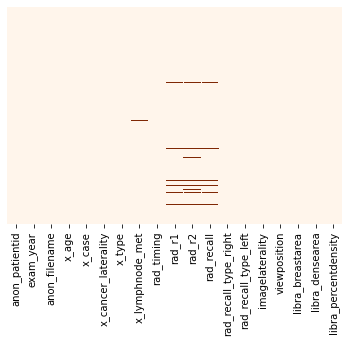

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False, cbar= False, cmap='Oranges')

In [ ]:
df["x_case"].value_counts()

0    18772
1     1177
Name: x_case, dtype: int64

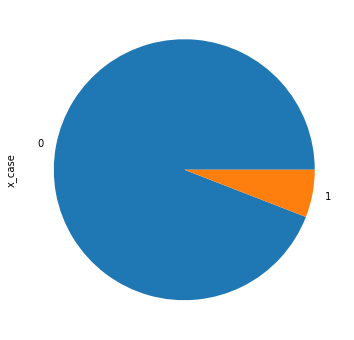

In [ ]:
# modifier la taille du graphique pour obtenir un cercle, pas une ellipse
fig, ax = plt.subplots(figsize=(6,6))
df['x_case'].value_counts().plot(kind="pie", ax=ax)
plt.show()

In [ ]:
data= df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 19947
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anon_patientid         18984 non-null  int64  
 1   exam_year              18984 non-null  int64  
 2   anon_filename          18984 non-null  object 
 3   x_age                  18984 non-null  int64  
 4   x_case                 18984 non-null  int64  
 5   x_cancer_laterality    18984 non-null  object 
 6   x_type                 18984 non-null  float64
 7   x_lymphnode_met        18984 non-null  float64
 8   rad_timing             18984 non-null  float64
 9   rad_r1                 18984 non-null  float64
 10  rad_r2                 18984 non-null  float64
 11  rad_recall             18984 non-null  float64
 12  rad_recall_type_right  18984 non-null  float64
 13  rad_recall_type_left   18984 non-null  float64
 14  imagelaterality        18984 non-null  object 
 15  vi

In [ ]:
data["x_case"].value_counts()

0    17928
1     1056
Name: x_case, dtype: int64

In [ ]:
var_qual=['x_age', 'x_case',
       'x_cancer_laterality', 'x_type', 'x_lymphnode_met', 'rad_timing',
       'rad_r1', 'rad_r2', 'rad_recall', 'rad_recall_type_right',
       'rad_recall_type_left', 'imagelaterality', 'viewposition']

var_quan=['libra_breastarea', 'libra_densearea', 'libra_percentdensity']

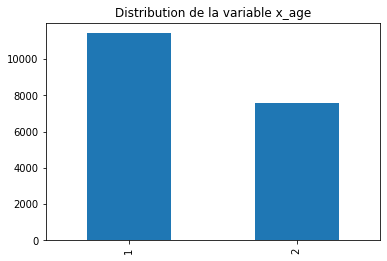

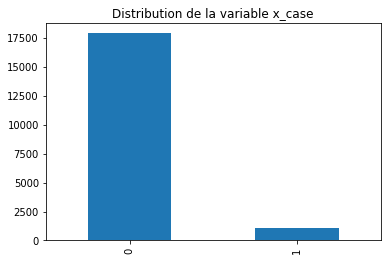

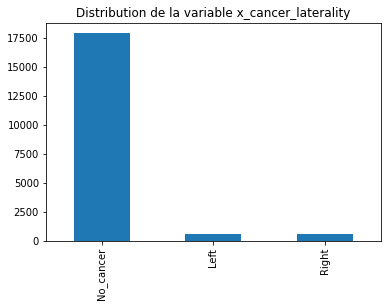

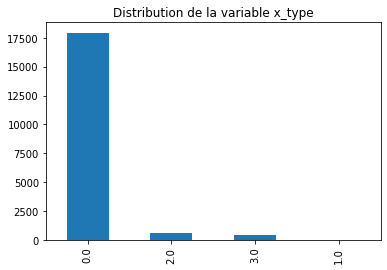

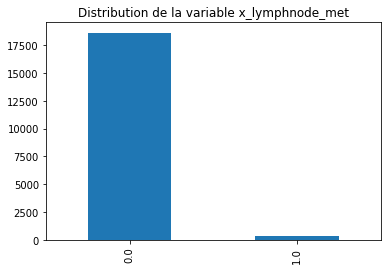

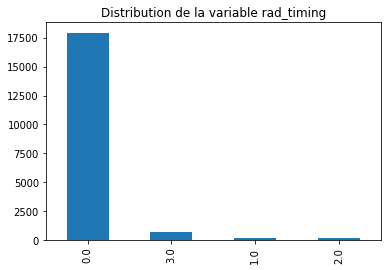

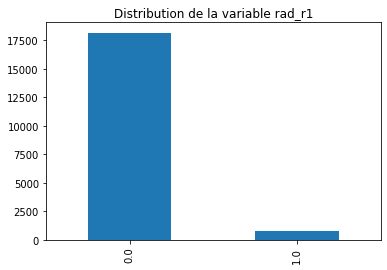

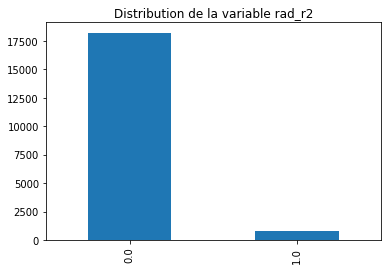

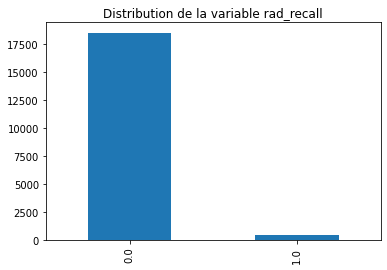

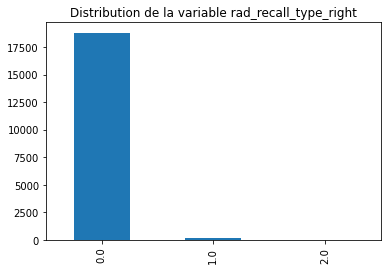

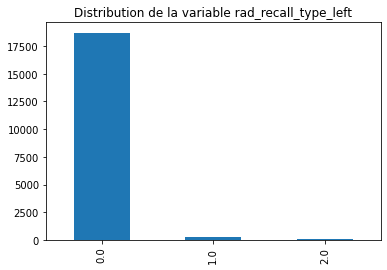

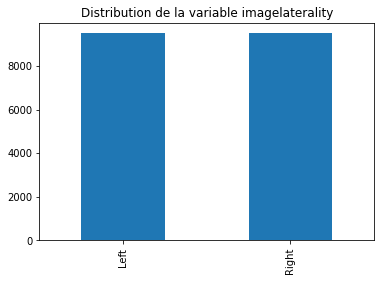

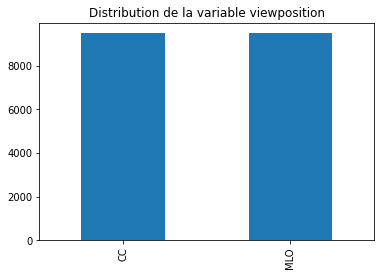

In [ ]:
for var in var_qual:
  data[var].value_counts().plot(kind="bar")
  plt.title("Distribution de la variable {}".format(var))
  plt.show()

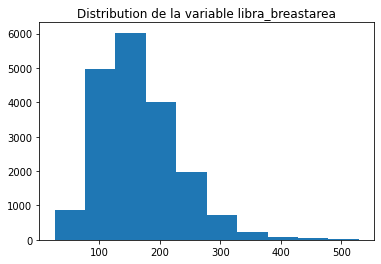

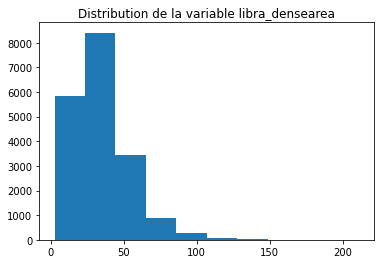

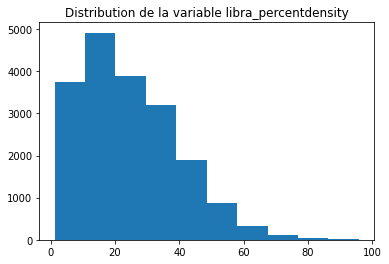

In [ ]:
for var in var_quan:
  plt.hist(data[var])
  plt.title("Distribution de la variable {}".format(var))
  plt.show()

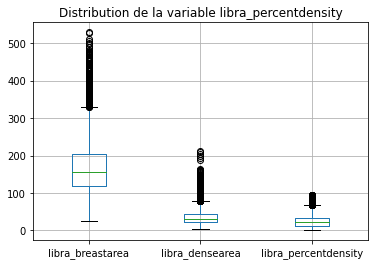

In [ ]:
data[var_quan].boxplot()
plt.title("Distribution de la variable {}".format(var))
plt.show()

In [ ]:
import scipy.stats as stats
#find Q1, Q3, and interquartile range for each column
Q1 = data[var_quan].quantile(q=.25)
Q3 = data[var_quan].quantile(q=.75)
IQR = data[var_quan].apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data1 = data[~((data[var_quan] < (Q1-1.5*IQR)) | (data[var_quan] > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data1.shape, data.shape

((17916, 19), (18984, 19))

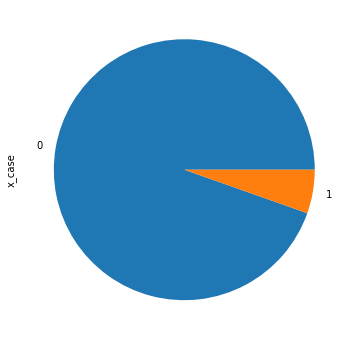

In [ ]:
# modifier la taille du graphique pour obtenir un cercle, pas une ellipse
fig, ax = plt.subplots(figsize=(6,6))
data1['x_case'].value_counts().plot(kind="pie", ax=ax)
plt.show()

In [ ]:
Table =pd.crosstab(data1['rad_recall'], data1['rad_recall_type_left'])
print(Table)

rad_recall_type_left    0.0  1.0  2.0
rad_recall                           
0.0                   17485    0    0
1.0                     162  217   52


In [ ]:
Table =pd.crosstab(data1['rad_recall'], data1['rad_recall_type_right'])
print(Table)

rad_recall_type_right    0.0  1.0  2.0
rad_recall                            
0.0                    17485    0    0
1.0                      249  154   28


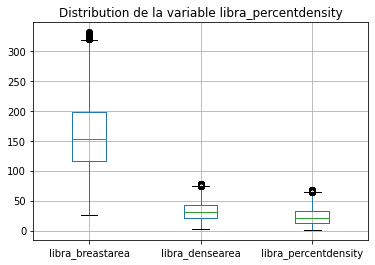

In [ ]:
data1[var_quan].boxplot()
plt.title("Distribution de la variable {}".format(var))
plt.show()

### Test de corrélation entre les variables quantitatives

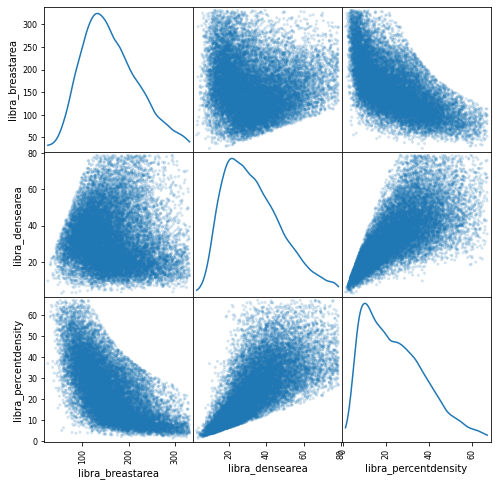

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(data1[var_quan], alpha=0.2, figsize=(8, 8), diagonal='kde')
plt.show()

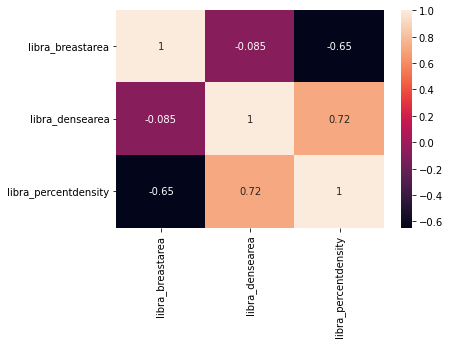

In [ ]:
sns.heatmap(data1[var_quan].corr(), annot=True)

#### Test d'indépendance de khi 2

In [ ]:
import statsmodels.api as sm

In [ ]:
for var in var_qual:
  tab= pd.crosstab(data1['x_case'], data1[var])
  table = sm.stats.Table(tab)
  rslt = table.test_nominal_association()
  print("The p-value of the khi2 test between the target variable and {} -------------------".format(var))
  print(rslt.pvalue)

The p-value of the khi2 test between the target variable and x_age -------------------
8.182698900838226e-05
The p-value of the khi2 test between the target variable and x_case -------------------
0.0
The p-value of the khi2 test between the target variable and x_cancer_laterality -------------------
0.0
The p-value of the khi2 test between the target variable and x_type -------------------
0.0
The p-value of the khi2 test between the target variable and x_lymphnode_met -------------------
0.0
The p-value of the khi2 test between the target variable and rad_timing -------------------
0.0
The p-value of the khi2 test between the target variable and rad_r1 -------------------
0.0
The p-value of the khi2 test between the target variable and rad_r2 -------------------
0.0
The p-value of the khi2 test between the target variable and rad_recall -------------------
0.0
The p-value of the khi2 test between the target variable and rad_recall_type_right -------------------
0.0
The p-value of the

#### Test d"ANOVA

In [ ]:
import scipy.stats as stats

La p-value vaut: 0.0800144039722055


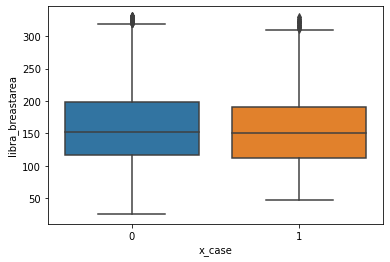

In [ ]:
fvalue, pvalue = stats.f_oneway(data1['libra_breastarea'][data1['x_case'] == 0],
               data1['libra_breastarea'][data1['x_case'] == 1])
print('La p-value vaut:',pvalue)

sns.boxplot(x="x_case",
                y='libra_breastarea',
                data=data1)

La p-value vaut: 2.9420547202876126e-10


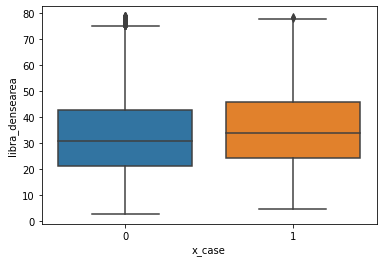

In [ ]:
fvalue, pvalue = stats.f_oneway(data1['libra_densearea'][data1['x_case'] == 0],
               data1['libra_densearea'][data1['x_case'] == 1])
print('La p-value vaut:',pvalue)

sns.boxplot(x="x_case",
                y='libra_densearea',
                data=data1)

La p-value vaut: 5.939067846148924e-10


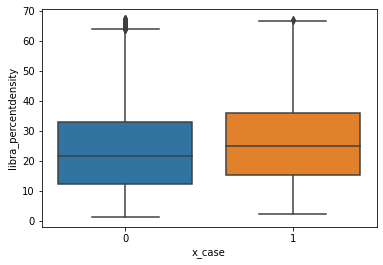

In [ ]:
fvalue, pvalue = stats.f_oneway(data1['libra_percentdensity'][data1['x_case'] == 0],
               data1['libra_percentdensity'][data1['x_case'] == 1])
print('La p-value vaut:',pvalue)

sns.boxplot(x="x_case",
                y='libra_percentdensity',
                data=data1)

### Suppression des variables non pertinante et non importante

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17916 entries, 0 to 19947
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   anon_patientid         17916 non-null  int64  
 1   exam_year              17916 non-null  int64  
 2   anon_filename          17916 non-null  object 
 3   x_age                  17916 non-null  int64  
 4   x_case                 17916 non-null  int64  
 5   x_cancer_laterality    17916 non-null  object 
 6   x_type                 17916 non-null  float64
 7   x_lymphnode_met        17916 non-null  float64
 8   rad_timing             17916 non-null  float64
 9   rad_r1                 17916 non-null  float64
 10  rad_r2                 17916 non-null  float64
 11  rad_recall             17916 non-null  float64
 12  rad_recall_type_right  17916 non-null  float64
 13  rad_recall_type_left   17916 non-null  float64
 14  imagelaterality        17916 non-null  object 
 15  vi

In [ ]:
data2= data1.drop(columns=["exam_year","x_cancer_laterality", "imagelaterality"], axis=1)

In [ ]:
data2.head()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,viewposition,libra_breastarea,libra_densearea,libra_percentdensity
0,2,00002_20990909_L_CC_1.dcm,1,1,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,CC,127.25809,29.595217,23.256058
1,2,00002_20990909_L_MLO_1.dcm,1,1,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,MLO,122.31812,39.298000,32.127705
2,2,00002_20990909_R_CC_1.dcm,1,1,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,CC,114.57063,23.637600,20.631468
3,2,00002_20990909_R_MLO_1.dcm,1,1,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,MLO,133.20238,36.162785,27.148750
4,4,00004_20990909_R_CC_1.dcm,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CC,201.18773,68.998276,34.295467


In [ ]:
data2["rad_decision"]=np.max(data2[['rad_r1', 'rad_r2']], axis=1)

In [ ]:
data2["rad_decision"].value_counts()

0.0    80017
1.0     5455
Name: rad_decision, dtype: int64

In [ ]:
import seaborn as sns

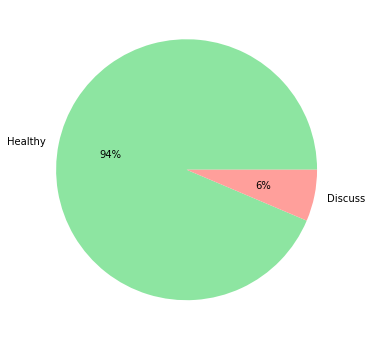

In [ ]:
#define data
data = [80017/(80017+ 5455), 5455/(80017+ 5455)]
labels = ["Healthy","Discuss"]

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[2:5]

#create pie chart
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.savefig("Pieplot_original_distribution")
plt.show()

In [ ]:
data2.replace({0.0:"Healthy", 1.0:"Discuss"}, inplace = True)

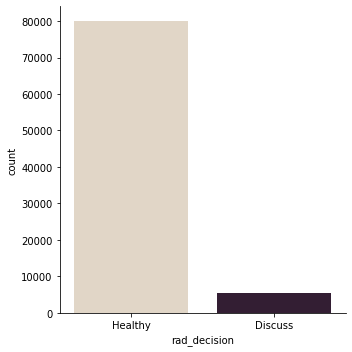

In [ ]:
sns.catplot(data=data2, x="rad_decision", kind="count", palette="ch:.25")
plt.savefig("Distribution")

In [ ]:
data2['x_case'].value_counts()

0    79586
1     5886
Name: x_case, dtype: int64

In [ ]:
data2.head()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,viewposition,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision
0,2,00002_20990909_L_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,0,0,CC,127.25809,29.595217,23.256058,0.0
1,2,00002_20990909_L_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,0,0,MLO,122.31812,39.298000,32.127705,0.0
2,2,00002_20990909_R_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,0,0,CC,114.57063,23.637600,20.631468,0.0
3,2,00002_20990909_R_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,0,0,MLO,133.20238,36.162785,27.148750,0.0
4,4,00004_20990909_R_CC_1.dcm,1,0,0,0.0,0,0.0,0.0,0.0,0,0,CC,201.18773,68.998276,34.295467,0.0


In [ ]:
data2.tail()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,rad_recall_type_right,rad_recall_type_left,viewposition,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision
98783,11301,11301_20990909_R_CC_1.dcm,1,0,0,0.0,0,0.0,0.0,0.0,0,0,CC,69.278275,24.969255,36.041973,0.0
98784,11303,11303_20990909_R_CC_1.dcm,2,1,3,0.0,1,1.0,1.0,1.0,0,2,CC,196.125440,33.502670,17.082268,1.0
98785,11303,11303_20990909_L_MLO_1.dcm,2,1,3,0.0,1,1.0,1.0,1.0,0,2,MLO,257.890530,15.262912,5.918369,1.0
98786,11303,11303_20990909_R_MLO_1.dcm,2,1,3,0.0,1,1.0,1.0,1.0,0,2,MLO,232.718640,14.388752,6.182896,1.0
98787,11303,11303_20990909_L_CC_1.dcm,2,1,3,0.0,1,1.0,1.0,1.0,0,2,CC,229.436040,40.073376,17.466034,1.0


### Get dummy encoding of multinomial qualitative variable

In [ ]:
data2= pd.get_dummies(data2, columns = ['rad_recall_type_right', 'rad_recall_type_left'])
data2.to_csv('data_onehot_projet.csv')
data2.head()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,...,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_0,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_0,rad_recall_type_left_1,rad_recall_type_left_2
0,2,00002_20990909_L_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,127.25809,29.595217,23.256058,0.0,1,0,0,1,0,0
1,2,00002_20990909_L_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,122.31812,39.298000,32.127705,0.0,1,0,0,1,0,0
2,2,00002_20990909_R_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,114.57063,23.637600,20.631468,0.0,1,0,0,1,0,0
3,2,00002_20990909_R_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,133.20238,36.162785,27.148750,0.0,1,0,0,1,0,0
4,4,00004_20990909_R_CC_1.dcm,1,0,0,0.0,0,0.0,0.0,0.0,...,201.18773,68.998276,34.295467,0.0,1,0,0,1,0,0


#### Selection of the subset which is required for the model building

We will apply dispropornate stratified random sampling to avoid imbalanced dataset problem and the bias that they can occur to our model, so we will select 1000 observation per sample 

In [ ]:
data2["rad_decision"].value_counts()

0.0    80017
1.0     5455
Name: rad_decision, dtype: int64

In [ ]:
data2['x_case'].value_counts()

0    79586
1     5886
Name: x_case, dtype: int64

In [ ]:
data2.to_csv('data_complet_onehot_projet.csv')
data2.head()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,...,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_0,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_0,rad_recall_type_left_1,rad_recall_type_left_2
0,2,00002_20990909_L_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,127.25809,29.595217,23.256058,0.0,1,0,0,1,0,0
1,2,00002_20990909_L_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,122.31812,39.298000,32.127705,0.0,1,0,0,1,0,0
2,2,00002_20990909_R_CC_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,114.57063,23.637600,20.631468,0.0,1,0,0,1,0,0
3,2,00002_20990909_R_MLO_1.dcm,1,1,3,0.0,2,0.0,0.0,0.0,...,133.20238,36.162785,27.148750,0.0,1,0,0,1,0,0
4,4,00004_20990909_R_CC_1.dcm,1,0,0,0.0,0,0.0,0.0,0.0,...,201.18773,68.998276,34.295467,0.0,1,0,0,1,0,0


In [ ]:
data4=data2.groupby('rad_decision', group_keys=False).apply(lambda x: x.sample(5000))
data4.to_csv('data_subset_onehot_projet.csv')
data4.head()

,anon_patientid,anon_filename,x_age,x_case,x_type,x_lymphnode_met,rad_timing,rad_r1,rad_r2,rad_recall,libra_breastarea,libra_densearea,libra_percentdensity,rad_decision,rad_recall_type_right_0,rad_recall_type_right_1,rad_recall_type_right_2,rad_recall_type_left_0,rad_recall_type_left_1,rad_recall_type_left_2
21455,1929,01929_20990909_L_CC_4.dcm,2,0,0,0.0,0,0.0,0.0,0.0,84.025986,25.204033,29.995522,0.0,1,0,0,1,0,0
63483,6130,06130_20990909_L_MLO_5.dcm,1,0,0,0.0,0,0.0,0.0,0.0,167.838710,32.348625,19.273636,0.0,1,0,0,1,0,0
55224,5215,05215_20990909_R_MLO_3.dcm,1,0,0,0.0,0,0.0,0.0,0.0,179.013080,48.934143,27.335514,0.0,1,0,0,1,0,0
9273,844,00844_20990909_R_CC_4.dcm,1,0,0,0.0,0,0.0,0.0,0.0,127.022900,45.641342,35.931587,0.0,1,0,0,1,0,0
9536,867,00867_20990909_R_CC_3.dcm,1,0,0,0.0,0,0.0,0.0,0.0,129.078540,19.353825,14.993835,0.0,1,0,0,1,0,0


In [ ]:
data4["rad_decision"].value_counts()

0.0    5000
1.0    5000
Name: rad_decision, dtype: int64

In [ ]:
data4["x_case"].value_counts()

0    8000
1    2000
Name: x_case, dtype: int64

In [ ]:
data4.to_csv('dataset_tabular.csv')

In [ ]:
data4.shape

(10000, 20)

In [ ]:
data_img_complet= data2[['anon_filename', 'rad_decision',"viewposition"]]

In [ ]:
data_img_complet.head()

,anon_filename,rad_decision,viewposition
0,00002_20990909_L_CC_1.dcm,0.0,CC
1,00002_20990909_L_MLO_1.dcm,0.0,MLO
2,00002_20990909_R_CC_1.dcm,0.0,CC
3,00002_20990909_R_MLO_1.dcm,0.0,MLO
4,00004_20990909_R_CC_1.dcm,0.0,CC


In [ ]:
data_img_complet.to_csv('dataset_image_complet.csv')

In [ ]:
data_img_complet["viewposition"].value_counts()

MLO    43466
CC     42006
Name: viewposition, dtype: int64

In [ ]:
dataset_img= data4[['anon_filename', 'rad_decision']]

In [ ]:
dataset_img.head()

,anon_filename,rad_decision
21455,01929_20990909_L_CC_4.dcm,0.0
63483,06130_20990909_L_MLO_5.dcm,0.0
55224,05215_20990909_R_MLO_3.dcm,0.0
9273,00844_20990909_R_CC_4.dcm,0.0
9536,00867_20990909_R_CC_3.dcm,0.0


In [ ]:
dataset_img.tail()

,anon_filename,rad_decision
81884,08199_20990909_R_MLO_1.dcm,1.0
73802,07217_20990909_L_MLO_1.dcm,1.0
98698,11275_20990909_R_CC_1.dcm,1.0
67119,06486_20990909_R_MLO_1.dcm,1.0
82207,08241_20990909_R_CC_1.dcm,1.0


In [ ]:
dataset_img.shape

(10000, 2)

In [ ]:
dataset_img["rad_decision"].value_counts()

0.0    5000
1.0    5000
Name: rad_decision, dtype: int64

In [ ]:
dataset_img.to_csv('dataset_image.csv')

### Model building

In [ ]:
features=['x_age', 'x_type', 'x_lymphnode_met', 'rad_timing', 'rad_r1',
       'rad_r2', 'rad_recall', 'libra_breastarea', 'libra_densearea',
       'libra_percentdensity', 'rad_recall_type_right_1.0',
       'rad_recall_type_right_2.0', 'rad_recall_type_left_1.0',
       'rad_recall_type_left_2.0']
X=data5[features]
Y=data5["x_case"]